<a href="https://colab.research.google.com/github/Aryan-Jhaveri/UCI-Online-News-Repo/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense

Loading Files On

In [ ]:
NewsPop_df = pd.read_csv('OnlineNewsPopularity.csv')


In [ ]:
NewsPop_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
NewsPop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
NewsPop_df.shape

(39644, 61)

In [ ]:
## Checking for Null Values
NewsPop_df.isnull().sum()

,0
url,0
timedelta,0
n_tokens_title,0
n_tokens_content,0
n_unique_tokens,0
...,...
title_subjectivity,0
title_sentiment_polarity,0
abs_title_subjectivity,0
abs_title_sentiment_polarity,0


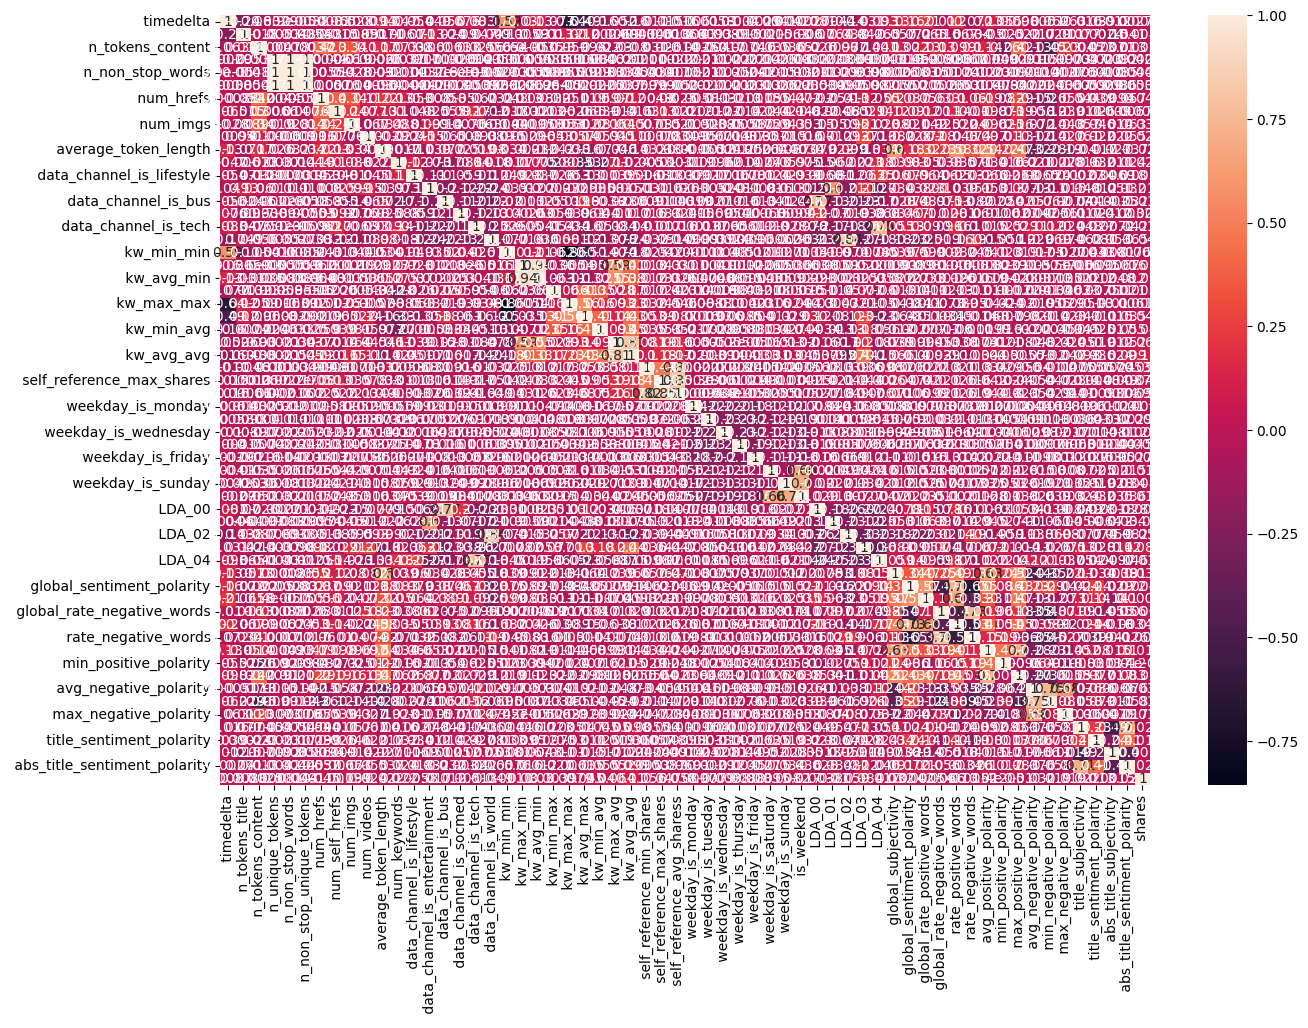

In [ ]:
## Exploratory Data Analysis
# Drop non-numeric columns before calculating correlation
numeric_df = NewsPop_df.select_dtypes(include=np.number)

# Generate the heatmap using the numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show() # Add this line to display the plot

## ERROR: This is useless and too big, might need to break the dataset into chunks to do exploration by categories and meaningful questions

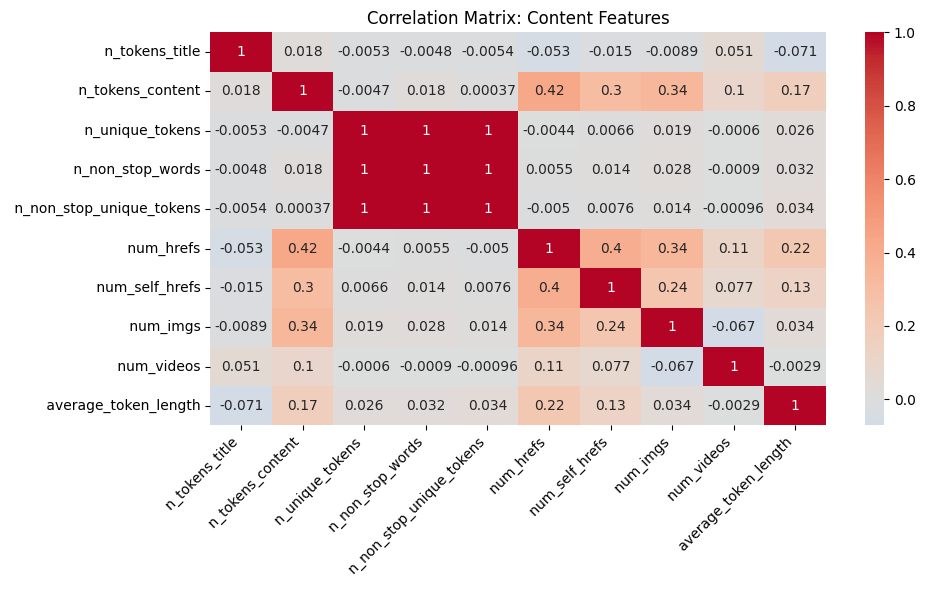

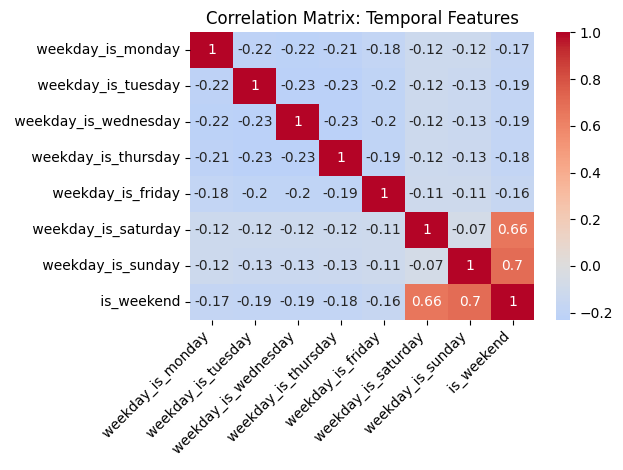

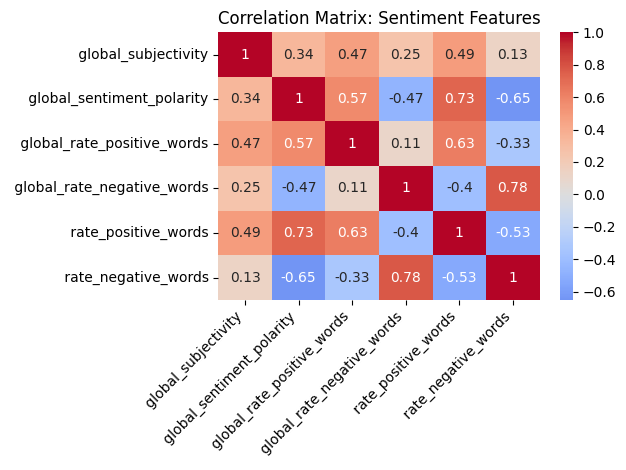

In [ ]:
# Let's create meaningful feature groups
# Ensure column names match exactly, including spaces and case
content_features = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
                   ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
                   ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length']

temporal_features = [' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
                    ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
                    ' weekday_is_sunday', ' is_weekend']

sentiment_features = [' global_subjectivity', ' global_sentiment_polarity',
                     ' global_rate_positive_words', ' global_rate_negative_words',
                     ' rate_positive_words', ' rate_negative_words']

# Create correlation heatmap for one group at a time
plt.figure(figsize=(10, 6))
# Access columns of Content Features
sns.heatmap(numeric_df[content_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Content Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.show()

# Access columns of Temporal Feautures
sns.heatmap(numeric_df[temporal_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Temporal Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.show()

# Access column of sentiment Features
sns.heatmap(numeric_df[sentiment_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Sentiment Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

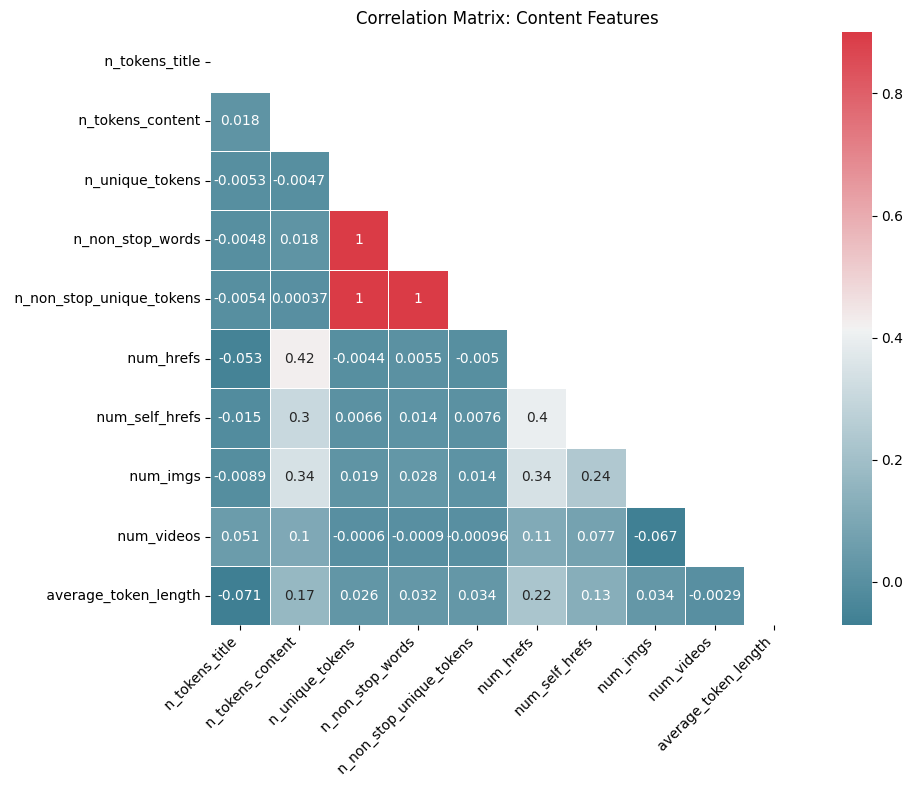

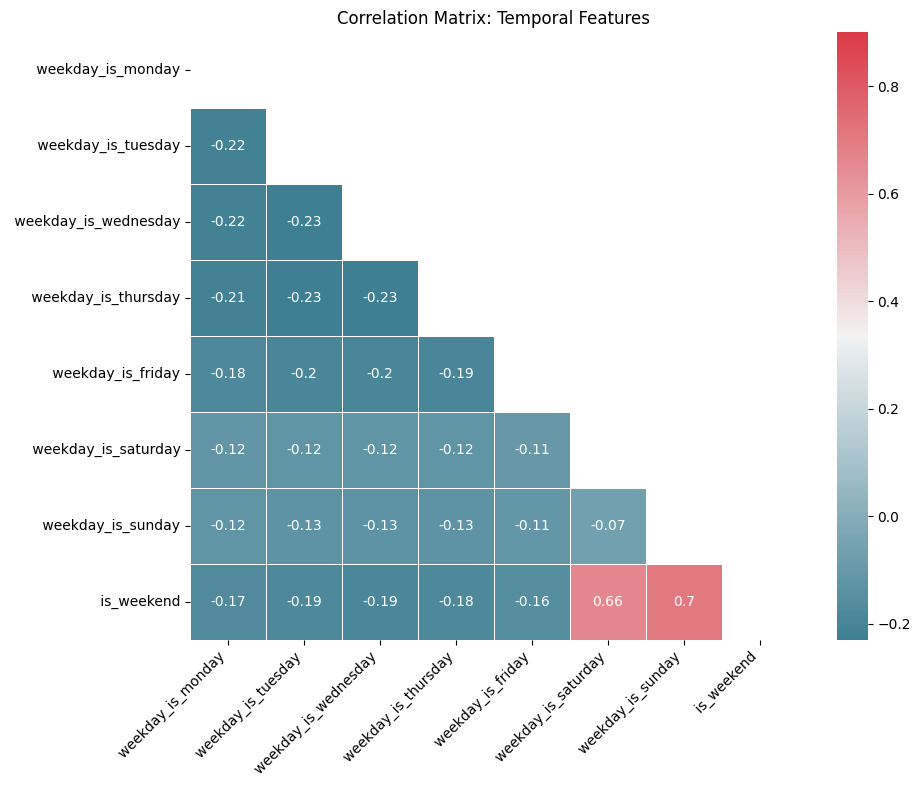

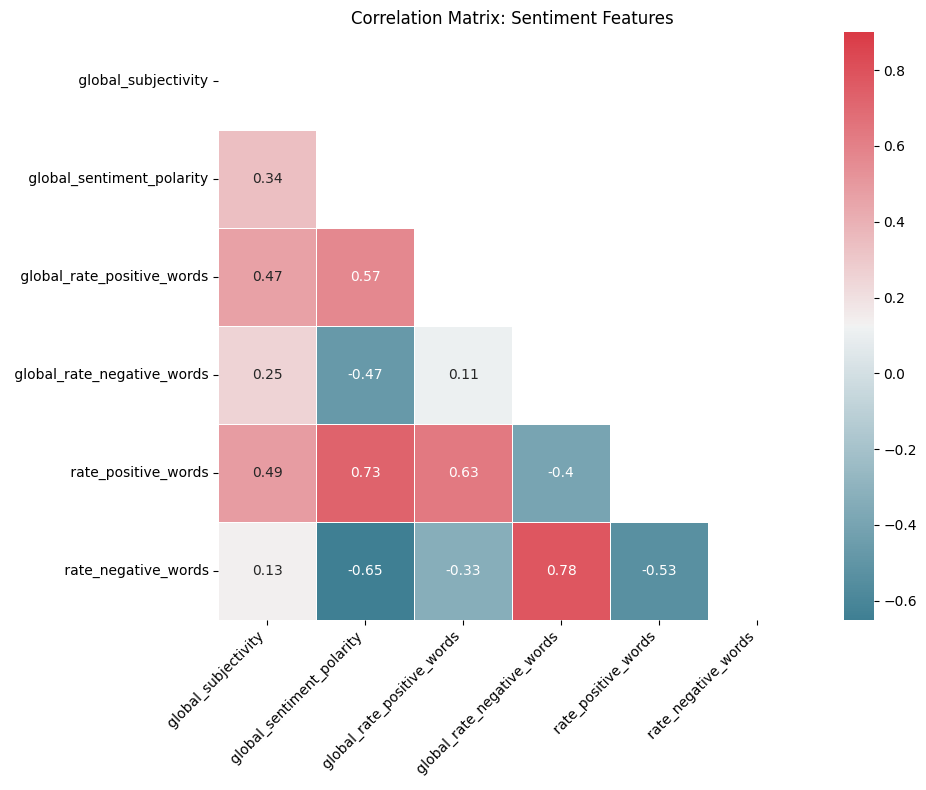

"\n--- Temporal Features Matrix:\n> The 0.66-0.7 correlation between is_weekend and weekend days\n> It's just showing that when is_weekend=1, Saturday/Sunday indicators are also likely to be 1 (logical relationship)\n\n--- Sentiment Features Matrix:\nStrong positive correlation (0.78) between global_rate_negative_words and rate_negative_words\nNegative correlation (-0.65) between global_sentiment_polarity and rate_negative_words\n"

In [ ]:
feature_groups = {
    'Content Features': content_features,
    'Temporal Features': temporal_features,
    'Sentiment Features': sentiment_features
}

for group_name, features in feature_groups.items():
    # Calculate correlation for the current feature group
    corr_matrix = numeric_df[features].corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr_matrix, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))  # Adjust figsize as needed

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.9,
                square=True, linewidths=.5, ax=ax, annot=True)

    plt.title(f'Correlation Matrix: {group_name}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

'''
--- Content Features Matrix:
> The 1.0 correlation between n_unique_tokens (Rate of unique words in the content) and n_non_stop_words (Rate of non-stop words in the content) shows these features move perfectly together
> The 0.42 correlation between num_hrefs (Number of links) and n_tokens_content ( Number of words in the content) suggests longer articles tend to have more links.
> The more number of videos there are less number of of unique words and so on.

--- Temporal Features Matrix:
> The 0.66-0.7 correlation between is_weekend and weekend days
> It's just showing that when is_weekend=1, Saturday/Sunday indicators are also likely to be 1 (logical relationship)

--- Sentiment Features Matrix:
> Strong positive correlation (0.78) between global_rate_negative_words(Rate of negative words in the content) and rate_negative_words(Rate of negative words among non-neutral tokens)
> Negative correlation (-0.65) between global_sentiment_polarity (Text sentiment polarity) and rate_negative_words(Rate of negative words among non-neutral tokens)
'''




In [38]:
# prompt: Lets find correlation between shares from Newspop and features list

import pandas as pd
import numpy as np

# Assuming NewsPop_df is already loaded as in your provided code

# ... (Your existing code for loading data and feature groups) ...

feature_groups = {
    'Content Features': content_features,
    'Temporal Features': temporal_features,
    'Sentiment Features': sentiment_features
}

for group_name, features in feature_groups.items():
    # Add 'shares' to the feature list
    features_with_target = features + [' shares']

    # Calculate correlations with shares
    correlations = numeric_df[features_with_target].corr()[' shares']

    print(f"\nCorrelations with shares for {group_name}:")
    print(correlations.drop(' shares').sort_values(ascending=False)) #drop 'shares' itself

'''
 For Content Features:

num_hrefs (0.045) and num_imgs (0.039) show the strongest positive correlations with shares, though these correlations are relatively weak
This suggests articles with more links and images tend to be shared slightly more
Interestingly, average_token_length has a slight negative correlation (-0.022), suggesting longer words might slightly decrease shareability

For Temporal Features:

Weekend posts (0.017) and Saturday posts (0.015) show very slight positive correlations
Thursday posts show the most negative correlation (-0.009), but again, these are very weak relationships
The correlations are so small that posting day likely isn't a major factor in sharing

For Sentiment Features:

global_subjectivity has the strongest correlation (0.032)
The correlations are very weak overall, suggesting sentiment might not be a strong driver of shares
'''


Correlations with shares for Content Features:
num_hrefs                   0.045404
num_imgs                    0.039388
num_videos                  0.023936
n_tokens_title              0.008783
n_tokens_content            0.002459
n_unique_tokens             0.000806
n_non_stop_words            0.000443
n_non_stop_unique_tokens    0.000114
num_self_hrefs             -0.001900
average_token_length       -0.022007
Name:  shares, dtype: float64

Correlations with shares for Temporal Features:
is_weekend              0.016958
weekday_is_saturday     0.015082
weekday_is_monday       0.009726
weekday_is_sunday       0.008230
weekday_is_wednesday   -0.003801
weekday_is_friday      -0.003884
weekday_is_tuesday     -0.007941
weekday_is_thursday    -0.008833
Name:  shares, dtype: float64

Correlations with shares for Sentiment Features:
global_subjectivity           0.031604
global_rate_negative_words    0.006615
global_sentiment_polarity     0.004163
global_rate_positive_words    0.000543
rat

"\n For Content Features:\n\nnum_hrefs (0.045) and num_imgs (0.039) show the strongest positive correlations with shares, though these correlations are relatively weak\nThis suggests articles with more links and images tend to be shared slightly more\nInterestingly, average_token_length has a slight negative correlation (-0.022), suggesting longer words might slightly decrease shareability\n\nFor Temporal Features:\n\nWeekend posts (0.017) and Saturday posts (0.015) show very slight positive correlations\nThursday posts show the most negative correlation (-0.009), but again, these are very weak relationships\nThe correlations are so small that posting day likely isn't a major factor in sharing\n\nFor Sentiment Features:\n\nglobal_subjectivity has the strongest correlation (0.032)\nThe correlations are very weak overall, suggesting sentiment might not be a strong driver of shares\n"

Important Note:

All these correlations are quite weak (below 0.05)
In statistics, correlations are typically considered:

Weak: 0.1-0.3

Moderate: 0.3-0.5

Strong: 0.5-1.0

So lets explore other attributes before moving on


In [46]:
keyword_features = [
    ' kw_min_min', ' kw_max_min', ' kw_avg_min',
    ' kw_min_max', ' kw_max_max', ' kw_avg_max',
    ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg'
]

channel_features = [
    ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
    ' data_channel_is_bus', ' data_channel_is_socmed',
    ' data_channel_is_tech', ' data_channel_is_world'
]

reference_features = [
    ' self_reference_min_shares', ' self_reference_max_shares',
    ' self_reference_avg_sharess'
]

title_sentiment_features = [
    ' title_subjectivity', ' title_sentiment_polarity',
    ' abs_title_subjectivity', ' abs_title_sentiment_polarity'
]

lda_features = [
    ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04'
]

## Feature groups expanded
feature_groups = {
    'Content Features': content_features,
    'Temporal Features': temporal_features,
    'Sentiment Features': sentiment_features,
    'Keyword Features': keyword_features,
    'Channel Features': channel_features,
    'Reference Features': reference_features,
    'Title Sentiment Features': title_sentiment_features,
    'LDA Features': lda_features
}

for group_name, features in feature_groups.items():
    # Add ' shares' to the feature list for correlation calculation
    features_with_target = features + [' shares']

    # Calculate correlations with shares using the extended feature list
    correlations = numeric_df[features_with_target].corr()[' shares']

    print(f"\nCorrelations with shares for {group_name}:")
    # Exclude ' shares' from the output to avoid showing self-correlation
    print(correlations.drop(' shares').sort_values(ascending=False))



Correlations with shares for Content Features:
num_hrefs                   0.045404
num_imgs                    0.039388
num_videos                  0.023936
n_tokens_title              0.008783
n_tokens_content            0.002459
n_unique_tokens             0.000806
n_non_stop_words            0.000443
n_non_stop_unique_tokens    0.000114
num_self_hrefs             -0.001900
average_token_length       -0.022007
Name:  shares, dtype: float64

Correlations with shares for Temporal Features:
is_weekend              0.016958
weekday_is_saturday     0.015082
weekday_is_monday       0.009726
weekday_is_sunday       0.008230
weekday_is_wednesday   -0.003801
weekday_is_friday      -0.003884
weekday_is_tuesday     -0.007941
weekday_is_thursday    -0.008833
Name:  shares, dtype: float64

Correlations with shares for Sentiment Features:
global_subjectivity           0.031604
global_rate_negative_words    0.006615
global_sentiment_polarity     0.004163
global_rate_positive_words    0.000543
rat